# Estatística descritiva

In [309]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
caminho = '/home/franciscofoz/Documents/GitHub/math-stats-training/Datasets/BDTD_inteligencia_artificial/BDTD_InteligenciaArtificial_assunto_20230214.csv'

bdtd_IA = pd.read_csv(caminho,sep=';')
bdtd_IA.head()

,id,title,authors,subjectsPOR,institutions,types,accesslevel,publicationDates,urls,formats,languages,Unnamed: 11
0,UNICAMP-30_3eab6a0503320dbba22284fde51a1cb4,Uma arquitetura para agentes inteligentes base...,"primary[Brenner, Mauren Fernanda Meira(NA)]",Inteligência artificial|Inteligencia artificia...,UNICAMP,masterThesis,openAccess,1996,https://hdl.handle.net/20.500.12733/1585158,masterThesis,por,NaN
1,UNB_e2dcc7d163164df0752c84252a650503,A proteção da vítima de danos causados por uma...,"primary[Coutinho, Marina de Alencar Araripe(NA)]",NaN,UNB,masterThesis,openAccess,2022,https://repositorio.unb.br/handle/10482/43971,masterThesis,por,NaN
2,UFMS_88fb1aabdd20b3a60686ebf024354f58,Rede Neural Difusa com T-normas Diferenciáveis...,"primary[Oliveira, Fabiano Ricardo de(NA)]",Inteligência Artificial|Redes Neurais|Fuzzy (I...,UFMS,masterThesis,openAccess,2007,https://repositorio.ufms.br/handle/123456789/463,masterThesis,por,NaN
3,UFC-7_1d8c12f78c3a3ef64d41d2bdd4c8b82f,Lógicas não-monotônicas,"primary[Pequeno, Marcelino Cavalcante(NA)]",Inteligência Artificial|Artificial Intelligence,UFC,masterThesis,openAccess,1985,http://www.repositorio.ufc.br/handle/riufc/31875,masterThesis,por,NaN
4,UECE-0_abd8841da6bba9021c15205efbfd05f3,DETECÇÃO DA PRESENÇA DO CAPACETE DE SEGURANÇA ...,"primary[MAIA, FELIPE JOSÉ AGUIAR(NA)]",Inteligência artificial,UECE,masterThesis,openAccess,2015,https://siduece.uece.br/siduece/trabalhoAcadem...,masterThesis,por,NaN


In [3]:
bdtd_IA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1734 non-null   object 
 1   title             1734 non-null   object 
 2   authors           1734 non-null   object 
 3   subjectsPOR       1446 non-null   object 
 4   institutions      1734 non-null   object 
 5   types             1734 non-null   object 
 6   accesslevel       1734 non-null   object 
 7   publicationDates  1734 non-null   int64  
 8   urls              1733 non-null   object 
 9   formats           1734 non-null   object 
 10  languages         1675 non-null   object 
 11  Unnamed: 11       0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 162.7+ KB


## Quantidade total de trabalhos

In [4]:
total_trabalhos = bdtd_IA.shape[0]
print('A quantidade total de trabalhos foi de ',total_trabalhos)

A quantidade total de trabalhos foi de  1734


## Quantidade teses e dissertações

In [5]:
quantidade_teses_dissertacoes = bdtd_IA['types'].value_counts()
quantidade_teses_dissertacoes

masterThesis      1284
doctoralThesis     450
Name: types, dtype: int64

In [6]:
percentual_teses_dissertacoes = bdtd_IA['types'].value_counts(normalize=True).round(2)*100
percentual_teses_dissertacoes

masterThesis      74.0
doctoralThesis    26.0
Name: types, dtype: float64

In [7]:
pd.DataFrame({'Frequência':quantidade_teses_dissertacoes,
              'Percentual(%)':percentual_teses_dissertacoes})

,Frequência,Percentual(%)
masterThesis,1284,74.0
doctoralThesis,450,26.0


In [8]:
def tabela_frequencia(df,variavel):
    '''
    Esta função irá realizar uma tabela de frequência de acordo com a variavel inserida
    do conjunto de dados extraídos da BDTD sobre "Inteligência Artificial".
    
    df = Conjunto de dados
    variavel = Variável do conjunto de dados da armazenadas na BDTD
    '''
    frequencia = df[variavel].value_counts()
    percentual = df[variavel].value_counts(normalize=True).round(4)*100

    tabela_freq = pd.DataFrame({'Frequência':frequencia,
                                'Percentual(%)':percentual})
    
    return tabela_freq

In [9]:
freq_dissertacoes_teses = tabela_frequencia(bdtd_IA,'types')
freq_dissertacoes_teses

,Frequência,Percentual(%)
masterThesis,1284,74.05
doctoralThesis,450,25.95


In [10]:
freq_dissertacoes_teses.rename(index = {'masterThesis': 'Dissertação', 'doctoralThesis': 'Tese'}, inplace = True)
freq_dissertacoes_teses

,Frequência,Percentual(%)
Dissertação,1284,74.05
Tese,450,25.95


## Quantidade de trabalhos por instituição

In [11]:
freq_instituicoes = tabela_frequencia(bdtd_IA,'institutions')
freq_instituicoes

,Frequência,Percentual(%)
UNICAMP,239,13.78
UFSC,200,11.53
UFRGS,193,11.13
ITA,140,8.07
UFPE,122,7.04
...,...,...
FURB,1,0.06
CPRM,1,0.06
Ânima,1,0.06
IFRN,1,0.06


#### Top 10 instituições

In [12]:
freq_instituicoes.head(10)

,Frequência,Percentual(%)
UNICAMP,239,13.78
UFSC,200,11.53
UFRGS,193,11.13
ITA,140,8.07
UFPE,122,7.04
UFCG,69,3.98
UTFPR,60,3.46
UFPR,57,3.29
UFSCAR,54,3.11
UNB,51,2.94


## Quantidade de teses e dissertações por instituição

In [13]:
freq_instituicoes_trabalhos = pd.crosstab(bdtd_IA.institutions,bdtd_IA.types)
freq_instituicoes_trabalhos['Trabalhos'] = freq_instituicoes_trabalhos.sum(axis=1)
freq_instituicoes_trabalhos.rename(columns = {'masterThesis': 'Dissertação', 'doctoralThesis': 'Tese'}, inplace = True)
freq_instituicoes_trabalhos.sort_values(by='Trabalhos',ascending=False,inplace=True)
freq_instituicoes_trabalhos

types,Tese,Dissertação,Trabalhos
institutions,,,
UNICAMP,98,141,239
UFSC,48,152,200
UFRGS,60,133,193
ITA,39,101,140
UFPE,48,74,122
...,...,...,...
LNCC,0,1,1
IFRN,0,1,1
IBICT,0,1,1


In [16]:
freq_percentual_instituicoes_trabalhos = pd.crosstab(bdtd_IA.institutions,bdtd_IA.types,normalize=True).round(4)*100

# Soma da quantidade total de trabalhos
freq_percentual_instituicoes_trabalhos['Trabalhos'] = freq_percentual_instituicoes_trabalhos.sum(axis=1)

#Ajustando nomenclatura das colunas
freq_percentual_instituicoes_trabalhos.rename(columns = {'masterThesis': 'Dissertação', 'doctoralThesis': 'Tese'}, inplace = True)

#Ordenação por quantidade de trabalhos
freq_percentual_instituicoes_trabalhos.sort_values(by='Trabalhos',ascending=False,inplace=True)


freq_percentual_instituicoes_trabalhos

types,Tese,Dissertação,Trabalhos
institutions,,,
UNICAMP,5.65,8.13,13.78
UFSC,2.77,8.77,11.54
UFRGS,3.46,7.67,11.13
ITA,2.25,5.82,8.07
UFPE,2.77,4.27,7.04
...,...,...,...
LNCC,0.00,0.06,0.06
IFRN,0.00,0.06,0.06
IBICT,0.00,0.06,0.06


## Quantidade de trabalhos por ano

In [17]:
bdtd_IA.head()

,id,title,authors,subjectsPOR,institutions,types,accesslevel,publicationDates,urls,formats,languages,Unnamed: 11
0,UNICAMP-30_3eab6a0503320dbba22284fde51a1cb4,Uma arquitetura para agentes inteligentes base...,"primary[Brenner, Mauren Fernanda Meira(NA)]",Inteligência artificial|Inteligencia artificia...,UNICAMP,masterThesis,openAccess,1996,https://hdl.handle.net/20.500.12733/1585158,masterThesis,por,NaN
1,UNB_e2dcc7d163164df0752c84252a650503,A proteção da vítima de danos causados por uma...,"primary[Coutinho, Marina de Alencar Araripe(NA)]",NaN,UNB,masterThesis,openAccess,2022,https://repositorio.unb.br/handle/10482/43971,masterThesis,por,NaN
2,UFMS_88fb1aabdd20b3a60686ebf024354f58,Rede Neural Difusa com T-normas Diferenciáveis...,"primary[Oliveira, Fabiano Ricardo de(NA)]",Inteligência Artificial|Redes Neurais|Fuzzy (I...,UFMS,masterThesis,openAccess,2007,https://repositorio.ufms.br/handle/123456789/463,masterThesis,por,NaN
3,UFC-7_1d8c12f78c3a3ef64d41d2bdd4c8b82f,Lógicas não-monotônicas,"primary[Pequeno, Marcelino Cavalcante(NA)]",Inteligência Artificial|Artificial Intelligence,UFC,masterThesis,openAccess,1985,http://www.repositorio.ufc.br/handle/riufc/31875,masterThesis,por,NaN
4,UECE-0_abd8841da6bba9021c15205efbfd05f3,DETECÇÃO DA PRESENÇA DO CAPACETE DE SEGURANÇA ...,"primary[MAIA, FELIPE JOSÉ AGUIAR(NA)]",Inteligência artificial,UECE,masterThesis,openAccess,2015,https://siduece.uece.br/siduece/trabalhoAcadem...,masterThesis,por,NaN


In [16]:
freq_ano = tabela_frequencia(bdtd_IA,'publicationDates')
freq_ano

,Frequência,Percentual(%)
2019,115,6.63
2018,95,5.48
2020,89,5.13
2021,88,5.07
2017,84,4.84
2015,81,4.67
2012,74,4.27
2003,70,4.04
2008,68,3.92
2011,68,3.92


## Quantidade de dissertações por ano

In [18]:
bdtd_IA_dissertacoes = bdtd_IA.query("types == 'masterThesis'")

In [19]:
freq_dissertacoes_ano = tabela_frequencia(bdtd_IA_dissertacoes,'publicationDates')
freq_dissertacoes_ano

,Frequência,Percentual(%)
2019,85,6.62
2020,71,5.53
2021,65,5.06
2012,62,4.83
2015,61,4.75
2018,60,4.67
2009,59,4.60
2003,53,4.13
2008,51,3.97
2011,51,3.97


## Quantidade de teses por ano

In [20]:
bdtd_IA_teses = bdtd_IA.query("types == 'doctoralThesis'")

In [21]:
freq_dissertacoes_ano = tabela_frequencia(bdtd_IA_teses,'publicationDates')
freq_dissertacoes_ano

,Frequência,Percentual(%)
2017,35,7.78
2018,35,7.78
2019,30,6.67
2021,23,5.11
2006,21,4.67
2015,20,4.44
2014,20,4.44
2016,19,4.22
2005,18,4.00
2020,18,4.00


## Demais assuntos relacionados

#### Limpeza de dados dos assuntos

In [107]:
def limpeza_padronizacao_assuntos(df):
    '''
    Essa função irá fazer todas as etapas de limpeza e transformação dos assuntos do DataFrame passado.
    
    df: DataFrame com a coluna 'subjectsPOR' do conjunto do projeto.
    
    '''

    #Isolando assuntos de cada monografia
    assuntos = df['subjectsPOR'].str.split('|',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split(' - ',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split('; ',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split(', ',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split('–',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split('::',expand=True).melt(value_name='assuntos')['assuntos'].dropna()
    assuntos = assuntos.str.split(' : ',expand=True).melt(value_name='assuntos')['assuntos'].dropna()

    assuntos.replace('1. Controladores programáveis 2. Controle automático 3. Controladores lógico progrmáveis (CLP) 4. Inteligência artificial',
                     'Controladores programáveis_Controle automático_Controladores lógico progrmáveis (CLP)_Inteligência artificial',inplace=True)

    assuntos = assuntos.str.split('_',expand=True).melt(value_name='assuntos')['assuntos'].dropna()


    # Padronizando em letras maiúsculas
    assuntos = assuntos.str.upper()

    # Removendo acentos
    assuntos = assuntos.str.replace(r'[ÁÀÃÂÄ]', 'A')
    assuntos = assuntos.str.replace(r'[ÉÈÊË]', 'E')
    assuntos = assuntos.str.replace(r'[ÍÌÎÏ]', 'I')
    assuntos = assuntos.str.replace(r'[ÓÒÕÔÖ]', 'O')
    assuntos = assuntos.str.replace(r'[ÚÙÛÜ]', 'U')

    #Limpeza detalhada dos elementos

    assuntos.replace('004.019','INTERACAO HOMEM-MAQUINA',inplace=True)

    assuntos.replace('ALGORITIMOS COMPUTACIONAIS','ALGORITMOS COMPUTACIONAIS',inplace=True)
    assuntos.replace('ALGORITIMOS GENERICOS','ALGORITMOS GENERICOS',inplace=True)

    aprendizado_maquina_palavras = ['APRENDIZADO DE MAAQUINA','APRENDIZADO DE MAQUINA;','APRENDIZADO DE MAQUINAS','APRENDIZADO DE MAQUINAS;','APRENDIZADO DE MAQUINHA',
     'APRENDIZADO DE MÁQUINA']

    for palavra in aprendizado_maquina_palavras:
        assuntos.replace(palavra,'APRENDIZADO DE MAQUINA',inplace=True)

    inteligencia_artificial_palavras = ['ARTIFICIAL INTELIGENCE','ARTIFICIAL INTELIGENCY','ARTIFICIAL INTELLIGENC','ARTIFICIAL INTELLIGENTCE']

    for palavra in inteligencia_artificial_palavras:
        assuntos.replace(palavra,'ARTIFICIAL INTELLIGENCE',inplace=True)


    #Cortar espaços em branco
    assuntos = assuntos.str.strip()

    #Ordenar valores
    assuntos.sort_values(ascending=True,inplace=True)
    
    #Criando DataFrame
    assuntos = pd.DataFrame(assuntos)
    
    return assuntos

Optei por não traduzir "termos sinônimos" (aprendizagem de máquina -> aprendizado de computador) e tradução de termos do inglês para o português, para manter a descrição original.

*Entretanto cabe a outra análise entender pelos conceitos.*

### Assuntos mais frequentes

In [146]:
print('A quantidade total de trabalhos foi de:',bdtd_IA.shape[0])

assuntos_geral = limpeza_padronizacao_assuntos(bdtd_IA)
tabela_frequencia(assuntos_geral,'assuntos').head(20)


A quantidade total de trabalhos foi de: 1734


,Frequência,Percentual(%)
INTELIGENCIA ARTIFICIAL,1331,14.28
ARTIFICIAL INTELLIGENCE,318,3.41
REDES NEURAIS (COMPUTAÇAO),120,1.29
REDES NEURAIS,110,1.18
COMPUTAÇAO,101,1.08
APRENDIZADO DE MAQUINA,59,0.63
SISTEMAS MULTIAGENTES,59,0.63
ALGORITMOS GENETICOS,51,0.55
MACHINE LEARNING,49,0.53
ENGENHARIA ELETRICA,47,0.50


Desconsiderando os temas principais:
* INTELIGENCIA ARTIFICIAL	
* ARTIFICIAL INTELLIGENCE


In [147]:
print('A quantidade total de trabalhos foi de:',bdtd_IA.shape[0])

assuntos_geral = limpeza_padronizacao_assuntos(bdtd_IA)
assuntos_geral = assuntos_geral[~assuntos_geral['assuntos'].str.contains('INTELIGENCIA ARTIFICIAL|ARTIFICIAL INTELLIGENCE')]

tabela_frequencia(assuntos_geral,'assuntos').head(20)


A quantidade total de trabalhos foi de: 1734


,Frequência,Percentual(%)
REDES NEURAIS (COMPUTAÇAO),120,1.59
REDES NEURAIS,110,1.46
COMPUTAÇAO,101,1.34
SISTEMAS MULTIAGENTES,59,0.78
APRENDIZADO DE MAQUINA,59,0.78
ALGORITMOS GENETICOS,51,0.68
MACHINE LEARNING,49,0.65
ENGENHARIA ELETRICA,47,0.62
ROBOTICA,47,0.62
SISTEMAS ESPECIALISTAS,44,0.58


#### Assuntos mais frequentes por instituição

#### UNICAMP

In [134]:
trabalhos_UNICAMP = bdtd_IA.query('institutions == "UNICAMP"')

print('A quantidade total de trabalhos foi de:',trabalhos_UNICAMP.shape[0])
assuntos_UNICAMP = limpeza_padronizacao_assuntos(trabalhos_UNICAMP)
tabela_frequencia(assuntos_UNICAMP,'assuntos').head(20)


A quantidade total de trabalhos foi de: 239


,Frequência,Percentual(%)
INTELIGENCIA ARTIFICIAL,232,13.23
ARTIFICIAL INTELLIGENCE,112,6.39
REDES NEURAIS (COMPUTAÇAO),61,3.48
APRENDIZADO DE MAQUINA,21,1.20
ALGORITMOS GENETICOS,19,1.08
MACHINE LEARNING,17,0.97
SISTEMAS ESPECIALISTAS (COMPUTAÇAO),14,0.80
ARTIFICIAL NEURAL NETWORKS,13,0.74
PROCESSAMENTO DE LINGUAGEM NATURAL (COMPUTAÇAO),13,0.74
PROCESSAMENTO DE IMAGENS,12,0.68


Desconsiderando os temas principais:
* INTELIGENCIA ARTIFICIAL	
* ARTIFICIAL INTELLIGENCE

In [148]:
print('A quantidade total de trabalhos foi de:',trabalhos_UNICAMP.shape[0])

assuntos_UNICAMP = limpeza_padronizacao_assuntos(trabalhos_UNICAMP)
assuntos_UNICAMP = assuntos_UNICAMP[~assuntos_UNICAMP['assuntos'].str.contains('INTELIGENCIA ARTIFICIAL|ARTIFICIAL INTELLIGENCE')]

tabela_frequencia(assuntos_UNICAMP,'assuntos').head(20)

A quantidade total de trabalhos foi de: 239


,Frequência,Percentual(%)
REDES NEURAIS (COMPUTAÇAO),61,4.36
APRENDIZADO DE MAQUINA,21,1.50
ALGORITMOS GENETICOS,19,1.36
MACHINE LEARNING,17,1.22
SISTEMAS ESPECIALISTAS (COMPUTAÇAO),14,1.00
ARTIFICIAL NEURAL NETWORKS,13,0.93
PROCESSAMENTO DE LINGUAGEM NATURAL (COMPUTAÇAO),13,0.93
PROCESSAMENTO DE IMAGENS,12,0.86
PROCESSAMENTO DE DADOS,11,0.79
VISAO POR COMPUTADOR,9,0.64


#### UFSC

Não foi encontrado assuntos no conjunto de dados

#### UFRGS

In [135]:
trabalhos_UFRGS = bdtd_IA.query('institutions == "UFRGS"')

print('A quantidade total de trabalhos foi de:',trabalhos_UFRGS.shape[0])
assuntos_UFRGS = limpeza_padronizacao_assuntos(trabalhos_UFRGS)
tabela_frequencia(assuntos_UFRGS,'assuntos').head(20)


A quantidade total de trabalhos foi de: 193


,Frequência,Percentual(%)
INTELIGENCIA ARTIFICIAL,186,21.65
SISTEMAS MULTIAGENTES,39,4.54
REDES NEURAIS,26,3.03
INFORMATICA,23,2.68
CONHECIMENTO,21,2.44
EDUCAÇAO,14,1.63
APRENDIZAGEM,14,1.63
AGENTES INTELIGENTES,13,1.51
MAQUINA,12,1.40
ROBOTICA,11,1.28


Desconsiderando os temas principais:
* INTELIGENCIA ARTIFICIAL	
* ARTIFICIAL INTELLIGENCE

In [149]:
print('A quantidade total de trabalhos foi de:',trabalhos_UFRGS.shape[0])

assuntos_UFRGS = limpeza_padronizacao_assuntos(trabalhos_UFRGS)
assuntos_UFRGS = assuntos_UFRGS[~assuntos_UFRGS['assuntos'].str.contains('INTELIGENCIA ARTIFICIAL|ARTIFICIAL INTELLIGENCE')]

tabela_frequencia(assuntos_UFRGS,'assuntos').head(20)

A quantidade total de trabalhos foi de: 193


,Frequência,Percentual(%)
SISTEMAS MULTIAGENTES,39,5.89
REDES NEURAIS,26,3.93
INFORMATICA,23,3.47
CONHECIMENTO,21,3.17
APRENDIZAGEM,14,2.11
EDUCAÇAO,14,2.11
AGENTES INTELIGENTES,13,1.96
MAQUINA,12,1.81
ROBOTICA,11,1.66
REDES,10,1.51


#### ITA

In [136]:
trabalhos_ITA = bdtd_IA.query('institutions == "ITA"')

print('A quantidade total de trabalhos foi de:',trabalhos_ITA.shape[0])
assuntos_ITA = limpeza_padronizacao_assuntos(trabalhos_ITA)
tabela_frequencia(assuntos_ITA,'assuntos').head(20)



A quantidade total de trabalhos foi de: 140


,Frequência,Percentual(%)
INTELIGENCIA ARTIFICIAL,108,10.78
COMPUTAÇAO,80,7.98
REDES NEURAIS,40,3.99
SISTEMAS ESPECIALISTAS,24,2.40
CONTROLE,24,2.40
ONTOLOGIAS (INTELIGENCIA ARTIFICIAL),22,2.20
ENGENHARIA DE SOFTWARE,21,2.10
ROBOTICA,13,1.30
ALGORITMOS,13,1.30
RECONHECIMENTO DE PADROES,13,1.30


Desconsiderando os temas principais:
* INTELIGENCIA ARTIFICIAL	
* ARTIFICIAL INTELLIGENCE

In [150]:
print('A quantidade total de trabalhos foi de:',trabalhos_ITA.shape[0])

assuntos_ITA = limpeza_padronizacao_assuntos(trabalhos_ITA)
assuntos_ITA = assuntos_ITA[~assuntos_ITA['assuntos'].str.contains('INTELIGENCIA ARTIFICIAL|ARTIFICIAL INTELLIGENCE')]

tabela_frequencia(assuntos_ITA,'assuntos').head(20)

A quantidade total de trabalhos foi de: 140


,Frequência,Percentual(%)
COMPUTAÇAO,80,9.30
REDES NEURAIS,40,4.65
SISTEMAS ESPECIALISTAS,24,2.79
CONTROLE,24,2.79
ENGENHARIA DE SOFTWARE,21,2.44
RECONHECIMENTO DE PADROES,13,1.51
ALGORITMOS,13,1.51
ROBOTICA,13,1.51
ENGENHARIA ELETRONICA,12,1.40
REPRESENTAÇAO DO CONHECIMENTO,12,1.40


#### UFPE

In [137]:
trabalhos_UFPE = bdtd_IA.query('institutions == "UFPE"')

print('A quantidade total de trabalhos foi de:',trabalhos_UFPE.shape[0])
assuntos_UFPE = limpeza_padronizacao_assuntos(trabalhos_UFPE)
tabela_frequencia(assuntos_UFPE,'assuntos').head(20)

A quantidade total de trabalhos foi de: 122


,Frequência,Percentual(%)
INTELIGENCIA ARTIFICIAL,118,26.58
APRENDIZAGEM DE MAQUINA,9,2.03
REDES NEURAIS ARTIFICIAIS,7,1.58
REDES NEURAIS,7,1.58
MINERAÇAO DE DADOS,6,1.35
ONTOLOGIAS,6,1.35
PROCESSAMENTO DE LINGUAGEM NATURAL,6,1.35
ENGENHARIA ELETRICA,5,1.13
PROCESSAMENTO DE IMAGENS,5,1.13
VISAO COMPUTACIONAL,4,0.90


Desconsiderando os temas principais:
* INTELIGENCIA ARTIFICIAL	
* ARTIFICIAL INTELLIGENCE

In [151]:
print('A quantidade total de trabalhos foi de:',trabalhos_UFPE.shape[0])

assuntos_UFPE = limpeza_padronizacao_assuntos(trabalhos_UFPE)
assuntos_UFPE = assuntos_UFPE[~assuntos_UFPE['assuntos'].str.contains('INTELIGENCIA ARTIFICIAL|ARTIFICIAL INTELLIGENCE')]

tabela_frequencia(assuntos_UFPE,'assuntos').head(20)

A quantidade total de trabalhos foi de: 122


,Frequência,Percentual(%)
APRENDIZAGEM DE MAQUINA,9,2.80
REDES NEURAIS ARTIFICIAIS,7,2.18
REDES NEURAIS,7,2.18
ONTOLOGIAS,6,1.87
PROCESSAMENTO DE LINGUAGEM NATURAL,6,1.87
MINERAÇAO DE DADOS,6,1.87
PROCESSAMENTO DE IMAGENS,5,1.56
ENGENHARIA ELETRICA,5,1.56
WEB SEMANTICA,4,1.25
CIENCIA DA COMPUTAÇAO,4,1.25


### Assuntos mais frequentes por ano

In [217]:
assuntos_ano = bdtd_IA[['publicationDates','subjectsPOR']]
assuntos_ano

,publicationDates,subjectsPOR
0,1996,Inteligência artificial|Inteligencia artificia...
1,2022,NaN
2,2007,Inteligência Artificial|Redes Neurais|Fuzzy (I...
3,1985,Inteligência Artificial|Artificial Intelligence
4,2015,Inteligência artificial
...,...,...
1729,2020,Inteligência artificial|Controle de acoplament...
1730,2018,"Solução de conflito, inovação tecnológica|Solu..."
1731,2017,Engenharia eletrônica|Redes neurais (Computaçã...
1732,2009,Inteligência artificial|Sistemas Fuzzy|Algorit...


In [221]:
def separar_elemento(df,separador):
    #Isolando assuntos de cada monografia
    '''
    Esta função irá separar cada assunto por um separador específico e depois irá agrupar
    com a coluna anteriorm referente ao ano.
    
    df: DataFrame com ano de publicação e assuntos
    separador: elemento que estará separando os assuntos
    '''
    assuntos_separados = df.subjectsPOR.str.split(separador,expand=True)

    assuntos_ano = df[['publicationDates']]\
                .join(assuntos_separados)\
                .melt(id_vars='publicationDates',value_name='subjectsPOR')[['publicationDates','subjectsPOR']]\
                .dropna()

    return assuntos_ano

In [244]:
assuntos_separados = separar_elemento(assuntos_ano,'|')
assuntos_separados = separar_elemento(assuntos_separados,' - ')
assuntos_separados = separar_elemento(assuntos_separados,'; ')
assuntos_separados = separar_elemento(assuntos_separados,', ')
assuntos_separados = separar_elemento(assuntos_separados,'-')
assuntos_separados = separar_elemento(assuntos_separados,'::')
assuntos_separados = separar_elemento(assuntos_separados,':')


assuntos_separados.subjectsPOR\
    .replace('1. Controladores programáveis 2. Controle automático 3. Controladores lógico progrmáveis (CLP) 4. Inteligência artificial',
             'Controladores programáveis_Controle automático_Controladores lógico progrmáveis (CLP)_Inteligência artificial',inplace=True)

assuntos_separados = separar_elemento(assuntos_separados,'_')

# Padronizando em letras maiúsculas
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.upper()

# Removendo acentos
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.replace(r'[ÁÀÃÂÄ]', 'A')
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.replace(r'[ÉÈÊË]', 'E')
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.replace(r'[ÍÌÎÏ]', 'I')
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.replace(r'[ÓÒÕÔÖ]', 'O')
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.replace(r'[ÚÙÛÜ]', 'U')

#Limpeza detalhada dos elementos
assuntos_separados.subjectsPOR.replace('004.019','INTERACAO HOMEM-MAQUINA',inplace=True)
assuntos_separados.subjectsPOR.replace('ALGORITIMOS COMPUTACIONAIS','ALGORITMOS COMPUTACIONAIS',inplace=True)
assuntos_separados.subjectsPOR.replace('ALGORITIMOS GENERICOS','ALGORITMOS GENERICOS',inplace=True)

#Limpeza do termo aprendizado de maquina
aprendizado_maquina_palavras = ['APRENDIZADO DE MAAQUINA','APRENDIZADO DE MAQUINA;','APRENDIZADO DE MAQUINAS','APRENDIZADO DE MAQUINAS;','APRENDIZADO DE MAQUINHA',
 'APRENDIZADO DE MÁQUINA']

for palavra in aprendizado_maquina_palavras:
    assuntos_separados.subjectsPOR.replace(palavra,'APRENDIZADO DE MAQUINA',inplace=True)

#Limpeza do termo inteligencia
inteligencia_artificial_palavras = ['ARTIFICIAL INTELIGENCE','ARTIFICIAL INTELIGENCY','ARTIFICIAL INTELLIGENC','ARTIFICIAL INTELLIGENTCE']

for palavra in inteligencia_artificial_palavras:
    assuntos_separados.subjectsPOR.replace(palavra,'ARTIFICIAL INTELLIGENCE',inplace=True)

#Cortar espaços em branco
assuntos_separados.subjectsPOR = assuntos_separados.subjectsPOR.str.strip()

assuntos_por_ano = assuntos_separados.copy()
assuntos_por_ano


,publicationDates,subjectsPOR
0,1996,INTELIGENCIA ARTIFICIAL
1,2007,INTELIGENCIA ARTIFICIAL
2,1985,INTELIGENCIA ARTIFICIAL
3,2015,INTELIGENCIA ARTIFICIAL
4,2014,INTELIGENCIA ARTIFICIAL
...,...,...
9498,1991,CONHECIMENTO
9499,1997,DIAGNOSTICO DE FALHAS EM SISTEMAS FISICOS
14052,2009,CONTROLE AUTOMATICO
23552,2009,CONTROLADORES LOGICO PROGRMAVEIS (CLP)


In [262]:
assuntos_por_ano.publicationDates.unique()

array([1996, 2007, 1985, 2015, 2014, 1999, 2005, 2001, 2020, 2009, 2011,
       2010, 2003, 2017, 2019, 2002, 2018, 2008, 2016, 2012, 1998, 1997,
       1994, 2000, 1990, 1991, 1989, 2004, 2021, 1988, 1995, 2022, 1986,
       2006, 2013, 1993, 1984, 1992, 1987])

In [255]:
freq_assuntos_ano = assuntos_por_ano.value_counts().to_frame('quantidade').reset_index()
freq_assuntos_ano

,publicationDates,subjectsPOR,quantidade
0,2019,INTELIGENCIA ARTIFICIAL,98
1,2018,INTELIGENCIA ARTIFICIAL,84
2,2020,INTELIGENCIA ARTIFICIAL,76
3,2017,INTELIGENCIA ARTIFICIAL,74
4,2021,INTELIGENCIA ARTIFICIAL,71
...,...,...,...
6217,2008,MODELOS NAO LINEARES (ESTATISTICA),1
6218,2008,MODELOS MATEMATICOS,1
6219,2008,MODELLING,1
6220,2008,MODELAGEM MATEMATICA,1


In [312]:
termos_mais_frequentes = [
    'INTELIGENCIA ARTIFICIAL',
    'REDES NEURAIS',
    'COMPUTAÇAO',
    'SISTEMAS MULTIAGENTES',
    'APRENDIZADO DE MAQUINA',
    'ALGORITMOS GENETICOS',
    'MACHINE LEARNING',
    'ARTIFICIAL INTELLIGENCE']


freq_assuntos_ano_termos_mais_frequentes = freq_assuntos_ano.query('subjectsPOR == @termos_mais_frequentes')

In [313]:
freq_assuntos_ano_termos_mais_frequentes

,publicationDates,subjectsPOR,quantidade
0,2019,INTELIGENCIA ARTIFICIAL,98
1,2018,INTELIGENCIA ARTIFICIAL,84
2,2020,INTELIGENCIA ARTIFICIAL,76
3,2017,INTELIGENCIA ARTIFICIAL,74
4,2021,INTELIGENCIA ARTIFICIAL,71
...,...,...,...
4758,1997,SISTEMAS MULTIAGENTES,1
5121,2010,APRENDIZADO DE MAQUINA,1
5276,2013,ALGORITMOS GENETICOS,1
5535,2007,MACHINE LEARNING,1


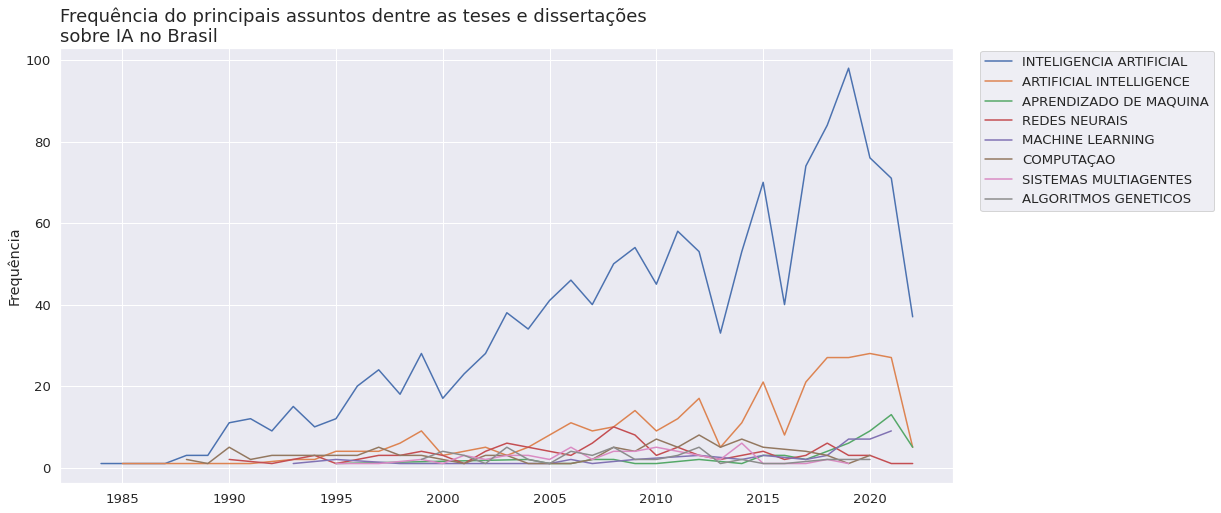

In [314]:
sns.set_theme('notebook')
sns.set(rc={'figure.figsize':(16,8)},font_scale=1.2)

ax = sns.lineplot(x='publicationDates',y='quantidade',hue='subjectsPOR',data=freq_assuntos_ano_termos_mais_frequentes)

ax.set_xlabel(None)
ax.set_ylabel('Frequência')
ax.set_title('Frequência do principais assuntos dentre as teses e dissertações \nsobre IA no Brasil',
             fontsize=18,loc='left')

ax.legend(bbox_to_anchor=(1.3, 1.01),loc='upper right')

ax = ax

In [338]:
termos = [
    'REDES NEURAIS',
    #'COMPUTAÇAO',
    #'SISTEMAS MULTIAGENTES',
    'APRENDIZADO DE MAQUINA',
    #'ALGORITMOS GENETICOS',
    'MACHINE LEARNING'
    ]


freq_assuntos_ano_aprendizado_maquina = freq_assuntos_ano.query('subjectsPOR == @termos')

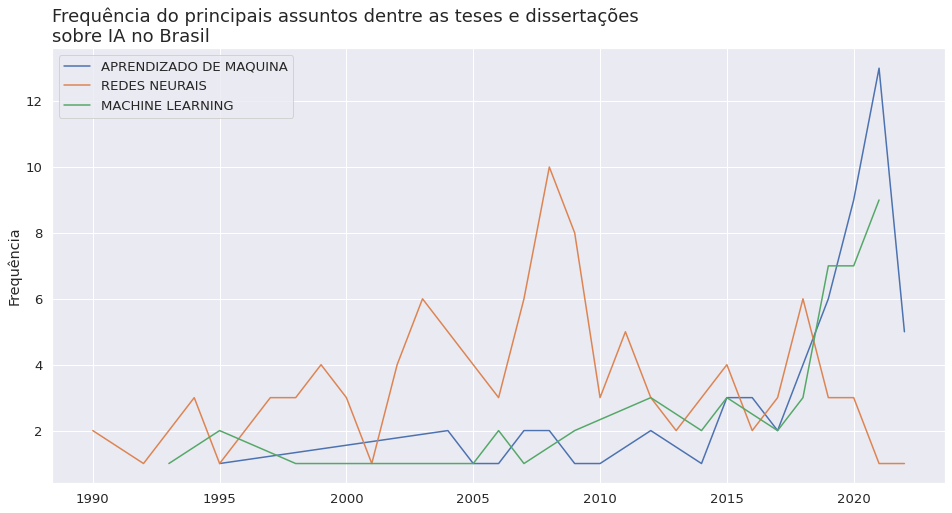

In [339]:
sns.set_theme('notebook')
sns.set(rc={'figure.figsize':(16,8)},font_scale=1.2)

ax = sns.lineplot(x='publicationDates',y='quantidade',hue='subjectsPOR',data=freq_assuntos_ano_aprendizado_maquina)

ax.set_xlabel(None)
ax.set_ylabel('Frequência')
ax.set_title('Frequência do principais assuntos dentre as teses e dissertações \nsobre IA no Brasil',
             fontsize=18,loc='left')

ax.legend(loc='upper left')

ax = ax

# Média, Moda e Mediana 
## Exemplo por ano

In [342]:
freq_ano = tabela_frequencia(bdtd_IA,'publicationDates')
freq_ano.head()

,Frequência,Percentual(%)
2019,115,6.63
2018,95,5.48
2020,89,5.13
2021,88,5.07
2017,84,4.84


In [343]:
media = freq_ano['Frequência'].mean()


44.46153846153846